# Simple Regression - Predicting Values from Data

This notebook will teach you how to use machine learning to predict one value from other values in your data.

**What we'll learn:**
1. Choose what we want to predict (target) and what to use for prediction (features)
2. Split our data into training and testing sets
3. Try 3 different regression models
4. Compare which model works best
5. Make predictions on new data

**Example:**
We might predict salary based on experience, job type, and company size.

**Instructions:**
- Make sure you have clean data from the previous notebook
- Run each cell one by one
- Choose your own features to experiment with!

In [1]:
# Import libraries for machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries imported successfully!")
print("Ready to build regression models!")

Libraries imported successfully!
Ready to build regression models!


## 1. Load Your Data

First, let's load our clean data from the previous notebook.

In [11]:
# Load your clean data
df = pd.read_csv('../datasets/cleaned_data.csv')

print(f"Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Look at the data
print("\nFirst few rows:")
df.head()

Data loaded successfully!
Shape: 64620 rows × 11 columns

First few rows:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
2,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
3,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
4,2025,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M


## 2. Choose What to Predict and What to Use for Prediction

We need to choose:
- **Target (Y)**: What we want to predict (must be a number)
- **Features (X)**: What we'll use to make the prediction (can be numbers or categories)

In [12]:
# Look at our columns to decide what to predict
print("Available columns in our dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col} - {df[col].dtype}")

print("\nNumerical columns (good for prediction targets):")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

print("\nAll columns (can be used as features):")
all_cols = df.columns.tolist()
print(all_cols)

Available columns in our dataset:
1. work_year - int64
2. experience_level - object
3. employment_type - object
4. job_title - object
5. salary - int64
6. salary_currency - object
7. salary_in_usd - int64
8. employee_residence - object
9. remote_ratio - int64
10. company_location - object
11. company_size - object

Numerical columns (good for prediction targets):
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

All columns (can be used as features):
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [20]:
# CHOOSE YOUR TARGET AND FEATURES HERE
# Change these to match your data and what you want to predict

# What we want to predict (must be numerical)
target_column = 'salary_in_usd'  # Change this to your target column

# What we'll use to make predictions (choose 2-5 columns)
feature_columns = ['experience_level', 'job_title', 'company_location']  # Change these

print(f"We want to predict: {target_column}")
print(f"Using these features: {feature_columns}")

# Check if our choices are valid
if target_column not in df.columns:
    print(f"ERROR: {target_column} not found in data")
else:
    print(f"✓ Target column '{target_column}' found")
    
missing_features = [col for col in feature_columns if col not in df.columns]
if missing_features:
    print(f"ERROR: These features not found: {missing_features}")
else:
    print("✓ All feature columns found")

We want to predict: salary_in_usd
Using these features: ['experience_level', 'job_title', 'company_location']
✓ Target column 'salary_in_usd' found
✓ All feature columns found


## 3. Prepare the Data for Machine Learning

We need to prepare our data so the computer can understand it.

In [21]:
# Create our target (Y) and features (X)
y = df[target_column]  # What we want to predict
X = df[feature_columns]  # What we'll use to predict

print("Data before preparation:")
print(f"Target shape: {y.shape}")
print(f"Features shape: {X.shape}")
print(f"Features data types:\n{X.dtypes}")

# Convert text columns to numbers (one-hot encoding)
X_prepared = pd.get_dummies(X, drop_first=True)

print(f"\nData after preparation:")
print(f"Features shape: {X_prepared.shape}")
print(f"New column names: {list(X_prepared.columns)}")

# Remove any rows with missing values
mask = ~(X_prepared.isnull().any(axis=1) | y.isnull())
X_clean = X_prepared[mask]
y_clean = y[mask]

print(f"\nAfter removing missing values:")
print(f"Final dataset size: {len(X_clean)} rows")
print(f"Features: {X_clean.shape[1]} columns")

Data before preparation:
Target shape: (64620,)
Features shape: (64620, 3)
Features data types:
experience_level    object
job_title           object
company_location    object
dtype: object

Data after preparation:
Features shape: (64620, 486)
New column names: ['experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'job_title_AI Content Writer', 'job_title_AI Data Engineer', 'job_title_AI Data Scientist', 'job_title_AI Developer', 'job_title_AI Engineer', 'job_title_AI Engineering Lead', 'job_title_AI Engineering Manager', 'job_title_AI Governance Lead', 'job_title_AI Governance Specialist', 'job_title_AI Lead', 'job_title_AI Machine Learning Engineer', 'job_title_AI Product Lead', 'job_title_AI Product Manager', 'job_title_AI Product Owner', 'job_title_AI Programmer', 'job_title_AI Research Engineer', 'job_title_AI Research Scientist', 'job_title_AI Researcher', 'job_title_AI Scientist', 'job_title_AI Software Development Engineer', 'job_title_AI Software Engineer', 'j

## 4. Split Data into Training and Testing Sets

We'll use 80% of our data to train the model and 20% to test how well it works.

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, 
    test_size=0.2,      # Use 20% for testing
    random_state=42     # For reproducible results
)

print("Data split successfully!")
print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")
print(f"Features: {X_train.shape[1]} columns")

print(f"\nTarget variable summary:")
print(f"Training target range: {y_train.min():.0f} to {y_train.max():.0f}")
print(f"Testing target range: {y_test.min():.0f} to {y_test.max():.0f}")

Data split successfully!
Training set: 51696 rows
Testing set: 12924 rows
Features: 486 columns

Target variable summary:
Training target range: 15000 to 800000
Testing target range: 15000 to 800000


## 5. Train Three Different Regression Models

Let's try three different types of models and see which works best!

In [30]:
# Model 1: Linear Regression (draws a straight line through the data)
print("Training Model 1: Linear Regression")
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)

# Calculate performance
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f"✓ Linear Regression (Ridge) trained!")
print(f"  Mean Squared Error: {mse1:.2f}")
print(f"  R² Score: {r2_1:.3f} (higher is better, max = 1.0)")


Training Model 1: Linear Regression
✓ Linear Regression (Ridge) trained!
  Mean Squared Error: 4733389997598846440987953201152.00
  R² Score: -800016509740867649536.000 (higher is better, max = 1.0)


In [24]:
# Model 2: Decision Tree (makes decisions like a flowchart)
print("Training Model 2: Decision Tree")
model2 = DecisionTreeRegressor(random_state=42, max_depth=10)
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

# Calculate performance
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"✓ Decision Tree trained!")
print(f"  Mean Squared Error: {mse2:.2f}")
print(f"  R² Score: {r2_2:.3f} (higher is better, max = 1.0)")

Training Model 2: Decision Tree
✓ Decision Tree trained!
  Mean Squared Error: 4536532182.32
  R² Score: 0.233 (higher is better, max = 1.0)


In [25]:
# Model 3: Random Forest (combines many decision trees)
print("Training Model 3: Random Forest")
model3 = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
model3.fit(X_train, y_train)

# Make predictions
y_pred3 = model3.predict(X_test)

# Calculate performance
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print(f"✓ Random Forest trained!")
print(f"  Mean Squared Error: {mse3:.2f}")
print(f"  R² Score: {r2_3:.3f} (higher is better, max = 1.0)")

Training Model 3: Random Forest
✓ Random Forest trained!
  Mean Squared Error: 4471097312.95
  R² Score: 0.244 (higher is better, max = 1.0)


## 6. Compare the Models

Let's see which model performed best on our test data!

In [26]:
# Compare all models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Mean_Squared_Error': [mse1, mse2, mse3],
    'R2_Score': [r2_1, r2_2, r2_3]
})

print("🏆 MODEL COMPARISON RESULTS")
print("=" * 50)
print(results.to_string(index=False, float_format='%.3f'))

# Find the best model
best_model_idx = results['R2_Score'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
best_r2 = results.loc[best_model_idx, 'R2_Score']

print(f"\n🥇 WINNER: {best_model_name}")
print(f"   R² Score: {best_r2:.3f}")

print(f"\nHow to interpret R² Score:")
print(f"- 1.0 = Perfect predictions")
print(f"- 0.8+ = Very good")
print(f"- 0.6+ = Good") 
print(f"- 0.4+ = Okay")
print(f"- Below 0.4 = Needs improvement")

🏆 MODEL COMPARISON RESULTS
            Model                  Mean_Squared_Error                   R2_Score
Linear Regression 4733389997598846440987953201152.000 -800016509740867649536.000
    Decision Tree                      4536532182.324                      0.233
    Random Forest                      4471097312.950                      0.244

🥇 WINNER: Random Forest
   R² Score: 0.244

How to interpret R² Score:
- 1.0 = Perfect predictions
- 0.8+ = Very good
- 0.6+ = Good
- 0.4+ = Okay
- Below 0.4 = Needs improvement


## 7. Visualise the Results

Let's create plots to see how well our models performed.

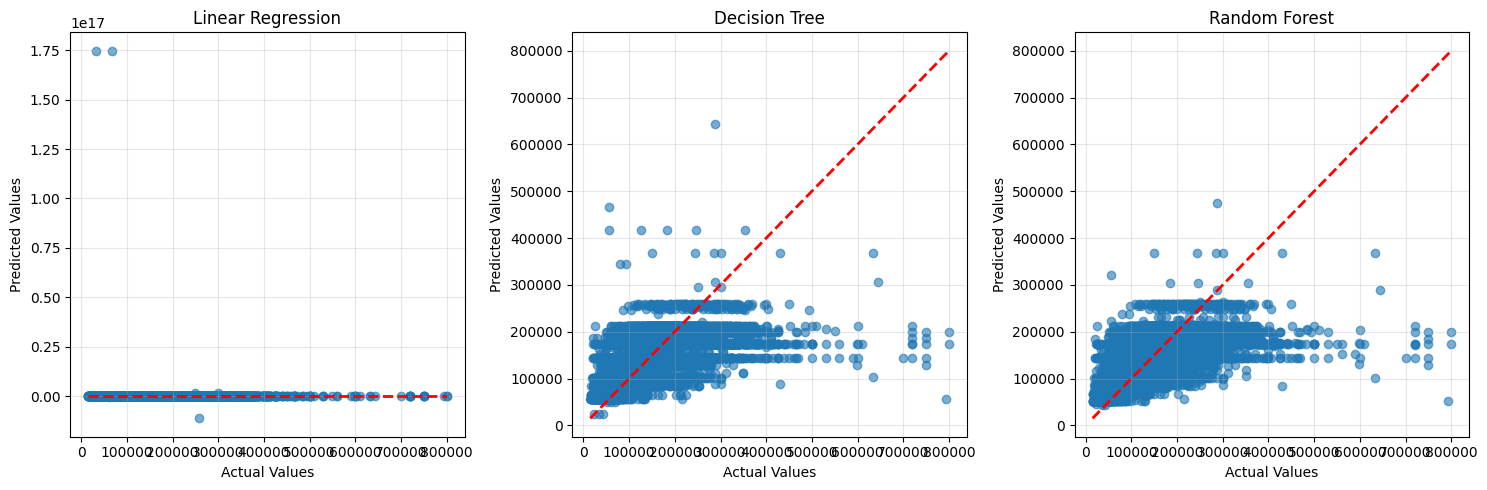

How to read these plots:
- Points close to the red line = good predictions
- Points far from the red line = poor predictions
- Tighter cluster around the line = better model


In [31]:
# Plot actual vs predicted values for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = [
    ('Linear Regression', y_pred1),
    ('Decision Tree', y_pred2), 
    ('Random Forest', y_pred3)
]

for i, (name, predictions) in enumerate(models):
    axes[i].scatter(y_test, predictions, alpha=0.6)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(f'{name}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("How to read these plots:")
print("- Points close to the red line = good predictions")
print("- Points far from the red line = poor predictions")
print("- Tighter cluster around the line = better model")

🔍 FEATURE IMPORTANCE (Random Forest)
This shows which features matter most for predictions:
                                            Feature  Importance
                                company_location_US       0.269
                                experience_level_SE       0.170
                                experience_level_EX       0.104
                                experience_level_MI       0.072
                             job_title_Data Analyst       0.066
                      job_title_Engineering Manager       0.049
                                company_location_CA       0.041
                job_title_Machine Learning Engineer       0.041
                                  job_title_Analyst       0.027
                       job_title_Research Scientist       0.024
                        job_title_Software Engineer       0.024
                        job_title_Research Engineer       0.019
                                company_location_GB       0.012
            

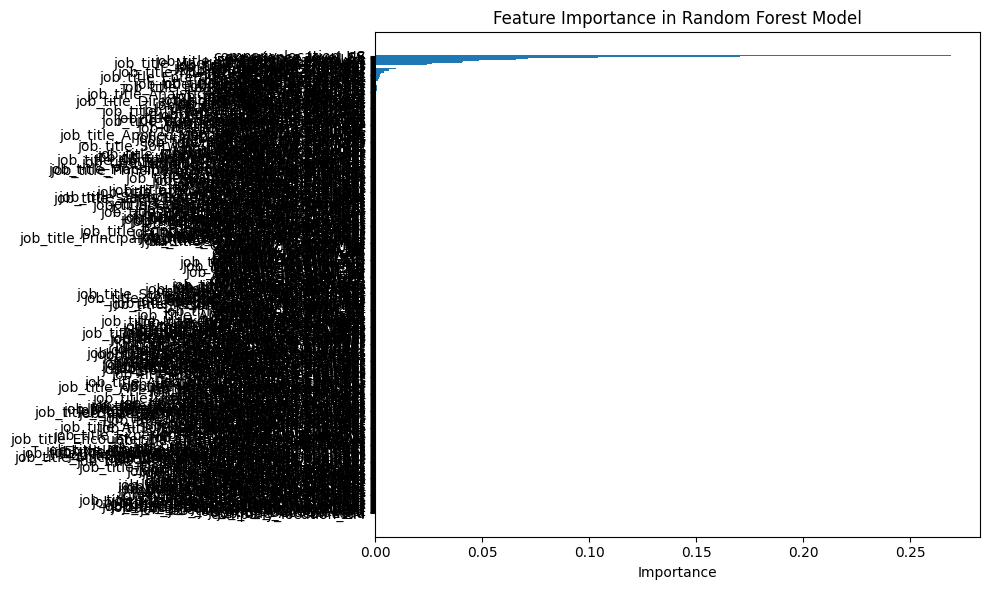

In [32]:
# Show which features are most important (for Random Forest)
print("🔍 FEATURE IMPORTANCE (Random Forest)")
print("This shows which features matter most for predictions:")
print("=" * 60)

feature_importance = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': model3.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False, float_format='%.3f'))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['Importance'])
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Make Predictions on New Data

Now let's use our best model to make predictions!

In [ ]:
# Use the best model to make predictions
models = [model1, model2, model3]
best_model = models[best_model_idx]

print(f"Using {best_model_name} for predictions")

# Example: Make predictions on a few test cases
print("\n📊 SAMPLE PREDICTIONS")
print("=" * 50)

# Show first 5 predictions vs actual values
sample_size = min(5, len(X_test))
sample_predictions = best_model.predict(X_test.iloc[:sample_size])

for i in range(sample_size):
    actual = y_test.iloc[i]
    predicted = sample_predictions[i]
    error = abs(actual - predicted)
    
    print(f"Case {i+1}:")
    print(f"  Actual: {actual:.0f}")
    print(f"  Predicted: {predicted:.0f}")
    print(f"  Error: {error:.0f}")
    print()

print("💡 TIP: You can use this model to predict new values!")
print("Just create a new row with the same features and use model.predict()")

Using Random Forest for predictions

📊 SAMPLE PREDICTIONS
Case 1:
  Actual: 120000
  Predicted: 174549
  Error: 54549

Case 2:
  Actual: 205412
  Predicted: 174352
  Error: 31060

Case 3:
  Actual: 265000
  Predicted: 175140
  Error: 89860

Case 4:
  Actual: 163500
  Predicted: 101672
  Error: 61828

Case 5:
  Actual: 50000
  Predicted: 101121
  Error: 51121

💡 TIP: You can use this model to predict new values!
Just create a new row with the same features and use model.predict()


## 9. Summary and Next Steps

**🎉 Congratulations! You've built your first regression models!**

**What we learned:**
- How to choose target variables and features
- How to prepare data for machine learning
- How to split data into training and testing sets
- How to train 3 different regression models
- How to compare model performance
- How to make predictions on new data

**Key takeaways:**
- **Linear Regression**: Simple, interpretable, good for linear relationships
- **Decision Tree**: Handles non-linear patterns, easy to understand
- **Random Forest**: Often the most accurate, combines many trees

**Try this next:**
1. Change the target variable to predict something else
2. Add or remove features to see how it affects performance
3. Try different train/test split ratios
4. Experiment with different datasets

**Remember:**
- Higher R² score = better model (closer to 1.0)
- Always test on unseen data
- More data usually means better models
- Feature selection matters!

## 10. Bonus: Regularized Linear Regression

Sometimes Linear Regression can have problems with certain features. Let's try regularized versions that are more robust!

In [34]:
# Import regularized regression models
from sklearn.linear_model import Ridge, Lasso

print("What is regularization?")
print("- Regularization helps prevent overfitting")
print("- It makes models more stable with difficult features")
print("- Ridge and Lasso are two common types")
print("- They work better when you have many features or correlated features")
print("\nLet's try them!")

What is regularization?
- Regularization helps prevent overfitting
- It makes models more stable with difficult features
- Ridge and Lasso are two common types
- They work better when you have many features or correlated features

Let's try them!


In [35]:
# Model 4: Ridge Regression (Linear Regression with L2 regularization)
print("Training Model 4: Ridge Regression")
model4 = Ridge(alpha=1.0, random_state=42)
model4.fit(X_train, y_train)

# Make predictions
y_pred4 = model4.predict(X_test)

# Calculate performance
mse4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)

print(f"✓ Ridge Regression trained!")
print(f"  Mean Squared Error: {mse4:.2f}")
print(f"  R² Score: {r2_4:.3f} (higher is better, max = 1.0)")
print(f"  Ridge helps when features are correlated")

Training Model 4: Ridge Regression
✓ Ridge Regression trained!
  Mean Squared Error: 4263518122.52
  R² Score: 0.279 (higher is better, max = 1.0)
  Ridge helps when features are correlated


In [36]:
# Model 5: Lasso Regression (Linear Regression with L1 regularization)
print("Training Model 5: Lasso Regression")
model5 = Lasso(alpha=1.0, random_state=42, max_iter=1000)
model5.fit(X_train, y_train)

# Make predictions
y_pred5 = model5.predict(X_test)

# Calculate performance
mse5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)

print(f"✓ Lasso Regression trained!")
print(f"  Mean Squared Error: {mse5:.2f}")
print(f"  R² Score: {r2_5:.3f} (higher is better, max = 1.0)")
print(f"  Lasso automatically selects important features")

Training Model 5: Lasso Regression
✓ Lasso Regression trained!
  Mean Squared Error: 4269261134.77
  R² Score: 0.278 (higher is better, max = 1.0)
  Lasso automatically selects important features


In [37]:
# Compare ALL models including regularized ones
all_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'Lasso Regression'],
    'Mean_Squared_Error': [mse1, mse2, mse3, mse4, mse5],
    'R2_Score': [r2_1, r2_2, r2_3, r2_4, r2_5]
})

print("🏆 COMPLETE MODEL COMPARISON")
print("=" * 60)
print(all_results.to_string(index=False, float_format='%.3f'))

# Find the best model overall
best_overall_idx = all_results['R2_Score'].idxmax()
best_overall_name = all_results.loc[best_overall_idx, 'Model']
best_overall_r2 = all_results.loc[best_overall_idx, 'R2_Score']

print(f"\n🥇 OVERALL WINNER: {best_overall_name}")
print(f"   R² Score: {best_overall_r2:.3f}")

print(f"\n📚 When to use each model:")
print(f"- Linear Regression: Simple relationships, interpretable")
print(f"- Ridge Regression: When features are correlated, more stable")
print(f"- Lasso Regression: Automatic feature selection, sparse solutions")
print(f"- Decision Tree: Non-linear patterns, easy to explain")
print(f"- Random Forest: Best overall performance, handles everything")

🏆 COMPLETE MODEL COMPARISON
            Model                  Mean_Squared_Error                   R2_Score
Linear Regression 4733389997598846440987953201152.000 -800016509740867649536.000
    Decision Tree                      4536532182.324                      0.233
    Random Forest                      4471097312.950                      0.244
 Ridge Regression                      4263518122.517                      0.279
 Lasso Regression                      4269261134.770                      0.278

🥇 OVERALL WINNER: Ridge Regression
   R² Score: 0.279

📚 When to use each model:
- Linear Regression: Simple relationships, interpretable
- Ridge Regression: When features are correlated, more stable
- Lasso Regression: Automatic feature selection, sparse solutions
- Decision Tree: Non-linear patterns, easy to explain
- Random Forest: Best overall performance, handles everything


In [38]:
# Show how Lasso selects features (sets some coefficients to zero)
print("🔍 FEATURE SELECTION BY LASSO")
print("=" * 50)

# Get coefficients for Ridge and Lasso
ridge_coef = pd.DataFrame({
    'Feature': X_clean.columns,
    'Ridge_Coefficient': model4.coef_
})

lasso_coef = pd.DataFrame({
    'Feature': X_clean.columns,
    'Lasso_Coefficient': model5.coef_
})

# Combine and show
feature_coef = pd.merge(ridge_coef, lasso_coef, on='Feature')
feature_coef['Lasso_Selected'] = (feature_coef['Lasso_Coefficient'] != 0)

print("Feature coefficients (Ridge vs Lasso):")
print(feature_coef.to_string(index=False, float_format='%.3f'))

# Count features selected by Lasso
selected_features = feature_coef['Lasso_Selected'].sum()
total_features = len(feature_coef)

print(f"\n📊 Lasso selected {selected_features} out of {total_features} features")
print(f"Features with coefficient = 0 are considered unimportant by Lasso")

🔍 FEATURE SELECTION BY LASSO
Feature coefficients (Ridge vs Lasso):
                                            Feature  Ridge_Coefficient  Lasso_Coefficient  Lasso_Selected
                                experience_level_EX          71863.374          71802.135            True
                                experience_level_MI          17423.433          17401.782            True
                                experience_level_SE          43044.414          43096.361            True
                        job_title_AI Content Writer         -54735.786         -51079.319            True
                         job_title_AI Data Engineer         -41870.897         -30309.717            True
                        job_title_AI Data Scientist         -31283.020         -21132.029            True
                             job_title_AI Developer          -5391.940            969.615            True
                              job_title_AI Engineer           7085.163          1364

### 💡 Troubleshooting Tips

**If you get errors with Linear Regression:**

1. **"Singular matrix" or "LinAlgError"**: 
   - Use Ridge or Lasso instead
   - Remove highly correlated features
   - Reduce the number of features

2. **Poor performance (low R² score)**:
   - Try regularized models (Ridge/Lasso)
   - Add more relevant features
   - Check for outliers in your data

3. **"Convergence warnings"**:
   - Increase `max_iter` parameter
   - Try Ridge regression instead
   - Standardize your features first

**Remember**: Ridge and Lasso are more robust than basic Linear Regression!